![Cover Page](coverpage.jpg)

# GDDA612 – Data Transformation and Management 

## Assessment - 1

### Subject: Examining the Relationship Between Population Growth, Energy Consumption, Undernourishment and CO2 Emissions in Countries.


### Task 1: Identify Data Sources

I have identified below three publicly available online data sources provide a diverse set of information related to my chosen business problem, and its helps to conduct a comprehensive analysis of Population Growth, Energy Consumption, Undernourishment, and CO2 Emissions.


The ‘worldometer’ is a platform run by international team of developers, researchers, and volunteers with the goal of making world statistics available in a thought-provoking and time relevant format to a wide audience around the world.

1. The amount of energy consumed globally today.
    - url1 = https://www.worldometers.info/energy/
2. Undernourished people in the world
    - url2 = 'https://www.worldometers.info/undernourishment/'
3. CO2 Emissions by Country
    - url3 = 'https://www.worldometers.info/co2-emissions/co2-emissions-by-country/'


### Task 2: Web Scraping  

### a)  
Applying web scrapping techniques to extract data from the three specified web sources and import them into three different datasets.

In [1]:
# Importing libraries
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [2]:
# Create an URL object
url1 = 'https://www.worldometers.info/energy/'
# Create object page
page = requests.get(url1)

In [3]:
page

<Response [200]>

In [4]:
# parser-lxml = Change html to Python friendly format
# Obtain page's information
soup = BeautifulSoup(page.text, 'lxml')
soup

<!DOCTYPE html>
<!--[if IE 8]> <html lang="en" class="ie8"> <![endif]--><!--[if IE 9]> <html lang="en" class="ie9"> <![endif]--><!--[if !IE]><!--><html lang="en"> <!--<![endif]--> <head> <meta charset="utf-8"/> <meta content="IE=edge" http-equiv="X-UA-Compatible"/> <meta content="width=device-width, initial-scale=1" name="viewport"/> <title>World Energy Statistics - Worldometer</title><meta content="Global energy consumption live statistics. Percentage of renewable and non-renewable (fossil fuels: oil, natural gas, and coal). Energy consumption and production by country." name="description"/><!-- Favicon --><link href="/favicon/favicon.ico" rel="shortcut icon" type="image/x-icon"/><link href="/favicon/apple-icon-57x57.png" rel="apple-touch-icon" sizes="57x57"/><link href="/favicon/apple-icon-60x60.png" rel="apple-touch-icon" sizes="60x60"/><link href="/favicon/apple-icon-72x72.png" rel="apple-touch-icon" sizes="72x72"/><link href="/favicon/apple-icon-76x76.png" rel="apple-touch-icon" s

In [5]:
# Obtain information from tag <table>
table = soup.find('table', id='example2')
table

<table cellspacing="0" class="table table-striped table-bordered" id="example2" text-align:left=""> <thead> <tr> <th width="17"><span class="style1">#</span></th> <th width="51"><span class="style1">Country</span></th> <th width="98"><span class="style1">Energy<br/> Consumption <br/> (BTU)</span></th> <th width="88"><span class="style1">World<br/> Share </span></th> <th width="76"><span class="style1">Per capita Yearly BTU</span></th> </tr> </thead> <tbody> <tr id="china"> <td style="text-align:center;">1</td> <td style="font-weight: bold; font-size:17px; text-align:left; padding-left:5px; padding-top:10px; padding-bottom:10px"><a href="/energy/china-energy">China</a></td> <td style="font-weight: bold; text-align:right">138,689,472,800,000</td> <td style="font-weight: bold; text-align:right">23.8% </td> <td style="font-weight: bold; text-align:right">98,342</td> </tr> <tr id="us"> <td style="text-align:center;">2</td> <td style="font-weight: bold; font-size:17px; text-align:left; paddi

In [6]:
# Obtain every title of columns with tag <th>
headers = []
for i in table.find_all('th'):
    title = i.text
    headers.append(title)

In [7]:
headers

['#',
 'Country',
 'Energy Consumption  (BTU)',
 'World Share ',
 'Per capita Yearly BTU']

In [8]:
# Create a dataframe
energy_table = pd.DataFrame(columns=headers)

In [9]:
energy_table.head()

,#,Country,Energy Consumption (BTU),World Share,Per capita Yearly BTU


In [10]:
energy_table.columns

Index(['#', 'Country', 'Energy Consumption  (BTU)', 'World Share ',
       'Per capita Yearly BTU'],
      dtype='object')

In [11]:
# Create a for loop to fill energy_table
for j in table.find_all('tr')[1:]:
    row_data = j.find_all('td')
    row = [i.text for i in row_data]
    length = len(energy_table)
    energy_table.loc[length] = row

In [12]:
energy_table.head()

,#,Country,Energy Consumption (BTU),World Share,Per capita Yearly BTU
0,1,China,"138,689,472,800,000",23.8%,"98,342"
1,2,United States,"97,661,161,460,000",16.8%,"296,130"
2,3,Russia,"32,832,743,720,000",5.6%,"225,728"
3,4,India,"30,476,788,610,000",5.2%,"22,505"
4,5,Japan,"19,402,928,820,000",3.3%,"153,186"


In [13]:
# Import libraries
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [14]:
# Create an URL object
url2 = 'https://www.worldometers.info/undernourishment/'
# Create object page
page = requests.get(url2)

In [15]:
page

<Response [200]>

In [16]:
# parser-lxml = Change html to Python friendly format
# Obtain page's information
soup = BeautifulSoup(page.text, 'lxml')
soup

<!DOCTYPE html>
<!--[if IE 8]> <html lang="en" class="ie8"> <![endif]--><!--[if IE 9]> <html lang="en" class="ie9"> <![endif]--><!--[if !IE]><!--><html lang="en"> <!--<![endif]--> <head> <meta charset="utf-8"/> <meta content="IE=edge" http-equiv="X-UA-Compatible"/> <meta content="width=device-width, initial-scale=1" name="viewport"/> <title>Undernourishment Statistics - Worldometer</title><meta content="World hunger: live statistics showing how many people in the world are undernourished in the world, the number of undernourished by country, linked to historical charts and more food security related statistics." name="description"/><!-- Favicon --><link href="/favicon/favicon.ico" rel="shortcut icon" type="image/x-icon"/><link href="/favicon/apple-icon-57x57.png" rel="apple-touch-icon" sizes="57x57"/><link href="/favicon/apple-icon-60x60.png" rel="apple-touch-icon" sizes="60x60"/><link href="/favicon/apple-icon-72x72.png" rel="apple-touch-icon" sizes="72x72"/><link href="/favicon/apple

In [17]:
# Obtain information from tag <table>
table = soup.find('table', id='example2')
table

<table cellspacing="0" class="table table-striped table-bordered" id="example2" text-align:left=""> <thead> <tr> <th width="5"><span class="style1">#</span></th> <th width="20"><span class="style1">Country</span></th> <th width="92"><span class="style1">Undernourished <br/> People</span></th> <th width="92"><span class="style1"> Percent of Population </span></th> <th width="92"><span class="style1">Population<br/> (2018) </span></th> </tr> </thead> <tbody> <tr id="india"> <td style="text-align:center;">1</td> <td style="font-weight: bold; font-size:17px; text-align:left; padding-left:5px; padding-top:10px; padding-bottom:10px">India</td> <td style="font-weight: bold; text-align:right"><a href="/food-agriculture/india-food-agriculture/#undernourished">194,400,000</a></td> <td style="text-align:right">14.20%</td> <td style="font-weight: bold; text-align:right"><a href="/world-population/india-population/">1,369,003,306</a></td> </tr> <tr id="china"> <td style="text-align:center;">2</td> 

In [18]:
# Obtain every title of columns with tag <th>
headers = []
for i in table.find_all('th'):
    title = i.text
    headers.append(title)

In [19]:
headers

['#',
 'Country',
 'Undernourished  People',
 ' Percent of Population ',
 'Population (2018) ']

In [20]:
# Create a dataframe
undernourished_table = pd.DataFrame(columns = headers)

In [21]:
undernourished_table

,#,Country,Undernourished People,Percent of Population,Population (2018)


In [22]:
undernourished_table.columns

Index(['#', 'Country', 'Undernourished  People', ' Percent of Population ',
       'Population (2018) '],
      dtype='object')

In [23]:
# Create a for loop to fill undernourished_table
for j in table.find_all('tr')[1:]:
    row_data = j.find_all('td')
    row = [i.text for i in row_data]
    length = len(undernourished_table)
    undernourished_table.loc[length] = row

In [24]:
undernourished_table.head()

,#,Country,Undernourished People,Percent of Population,Population (2018)
0,1,India,"194,400,000",14.20%,"1,369,003,306"
1,2,China,"121,400,000",8.57%,"1,417,069,468"
2,3,Pakistan,"40,000,000",18.20%,"219,731,479"
3,4,Nigeria,"25,600,000",12.90%,"198,387,623"
4,5,Bangladesh,"24,200,000",14.78%,"163,683,958"


In [25]:
# Import libraries
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [26]:
# Create an URL object
url3 = 'https://www.worldometers.info/co2-emissions/co2-emissions-by-country/'
# Create object page
page = requests.get(url3)

In [27]:
page

<Response [200]>

In [28]:
# parser-lxml = Change html to Python friendly format
# Obtain page's information
soup = BeautifulSoup(page.text, 'lxml')
soup

<!DOCTYPE html>
<!--[if IE 8]> <html lang="en" class="ie8"> <![endif]--><!--[if IE 9]> <html lang="en" class="ie9"> <![endif]--><!--[if !IE]><!--><html lang="en"> <!--<![endif]--> <head> <meta charset="utf-8"/> <meta content="IE=edge" http-equiv="X-UA-Compatible"/> <meta content="width=device-width, initial-scale=1" name="viewport"/> <title>CO2 Emissions by Country - Worldometer</title><meta content="Carbon Dioxide (CO2) Emissions by Country in the world with Global share of CO2 greenhouse emissions by country" name="description"/><!-- Favicon --><link href="/favicon/favicon.ico" rel="shortcut icon" type="image/x-icon"/><link href="/favicon/apple-icon-57x57.png" rel="apple-touch-icon" sizes="57x57"/><link href="/favicon/apple-icon-60x60.png" rel="apple-touch-icon" sizes="60x60"/><link href="/favicon/apple-icon-72x72.png" rel="apple-touch-icon" sizes="72x72"/><link href="/favicon/apple-icon-76x76.png" rel="apple-touch-icon" sizes="76x76"/><link href="/favicon/apple-icon-114x114.png" rel

In [29]:
# Obtain information from tag <table>
table = soup.find('table', id='example2')
table

<table class="table table-striped table-bordered" id="example2"> <thead> <tr> <th>#</th> <th>Country</th> <th>CO2 Emissions<br/> (tons, 2016) </th> <th>1 Year<br/> Change </th> <th>Population<br/> (2016) </th> <th>Per<br/> capita </th> <th>Share<br/> of world </th> </tr> </thead> <tbody> <tr> <td style="text-align:center">1</td> <td style="font-weight: bold; font-size:15px; text-align:left; padding-top:10px; padding-bottom:10px"><a href="/co2-emissions/china-co2-emissions/">China</a></td> <td style="font-weight: bold; text-align:right;">10,432,751,400</td> <td style="font-weight: bold; text-align:right;">-0.28%</td> <td style="font-weight: bold; text-align:right;">1,401,889,681</td> <td style="font-weight: bold; text-align:right;">7.44</td> <td style="font-weight: bold; text-align:right;">29.18%</td> </tr> <tr> <td style="text-align:center">2</td> <td style="font-weight: bold; font-size:15px; text-align:left; padding-top:10px; padding-bottom:10px"><a href="/co2-emissions/us-co2-emissio

In [30]:
# Obtain every title of columns with tag <th>
headers = []
for i in table.find_all('th'):
    title = i.text
    headers.append(title)

In [31]:
headers

['#',
 'Country',
 'CO2 Emissions (tons, 2016) ',
 '1 Year Change ',
 'Population (2016) ',
 'Per capita ',
 'Share of world ']

In [32]:
# Create a dataframe
co2emission_table = pd.DataFrame(columns = headers)

In [33]:
co2emission_table

,#,Country,"CO2 Emissions (tons, 2016)",1 Year Change,Population (2016),Per capita,Share of world


In [34]:
co2emission_table.columns

Index(['#', 'Country', 'CO2 Emissions (tons, 2016) ', '1 Year Change ',
       'Population (2016) ', 'Per capita ', 'Share of world '],
      dtype='object')

In [35]:
# Create a for loop to fill co2emission_table
for j in table.find_all('tr')[1:]:
    row_data = j.find_all('td')
    row = [i.text for i in row_data]
    length = len(co2emission_table)
    co2emission_table.loc[length] = row

In [36]:
co2emission_table.head()

,#,Country,"CO2 Emissions (tons, 2016)",1 Year Change,Population (2016),Per capita,Share of world
0,1,China,"10,432,751,400",-0.28%,"1,401,889,681",7.44,29.18%
1,2,United States,"5,011,686,600",-2.01%,"327,210,198",15.32,14.02%
2,3,India,"2,533,638,100",4.71%,"1,338,636,340",1.89,7.09%
3,4,Russia,"1,661,899,300",-2.13%,"145,109,157",11.45,4.65%
4,5,Japan,"1,239,592,060",-1.21%,"126,993,857",9.76,3.47%


### b)
In upholding ethical standards and adhering to data privacy regulations, this web scraping assessment prioritized with informed consent and ensured that data collected is from publicly accessible websites. Firstly, a formal request is submitted to the website for the required page information, begin the web scraping process only upon acceptance. Additionally, a commitment to respect intellectual property is observed, avoiding any potential harm to both websites and users.


Furthermore, this approach is closely aligned with the Māori and Pasifika Research guidelines, demonstrating a deep commitment to cultural sensitivity, social responsibility, and robust data governance. The web scraping assessment consistently upholds the principles of data privacy throughout its execution.


### c) 
The data collection and handling is very important, especially when considering the values of respect and privacy within Māori and Pasifika culture, as expressed through Tikanga, Whakapapa, and Pepeha.
1. Tikanga involves following ethical practices and protocols, and the importance of treating information with respect and integrity. 
2. Whakapapa, focusing on genealogy and interconnectedness, highlights the necessity of considering individuals and communities during data handling.
3. Pepeha which involves introducing oneself through a personal narrative, and the importance of individual privacy and the right to control one's information. 

The importance of responsible data practices within Māori and Pasifika cultural frameworks includes informed consent, safeguarding the confidentiality of personal data, and recognizing the relationships between data and individuals. Following these principles ensures that data collection aligns with cultural contexts of Tikanga, Whakapapa, and Pepeha.


### Task 3: Data Preparation and Cleansing  

**Table 1 - energy_table**

In [37]:
energy_table.head()

,#,Country,Energy Consumption (BTU),World Share,Per capita Yearly BTU
0,1,China,"138,689,472,800,000",23.8%,"98,342"
1,2,United States,"97,661,161,460,000",16.8%,"296,130"
2,3,Russia,"32,832,743,720,000",5.6%,"225,728"
3,4,India,"30,476,788,610,000",5.2%,"22,505"
4,5,Japan,"19,402,928,820,000",3.3%,"153,186"


In [38]:
energy_table.info()

<class 'pandas.core.frame.DataFrame'>
Index: 209 entries, 0 to 208
Data columns (total 5 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   #                          209 non-null    object
 1   Country                    209 non-null    object
 2   Energy Consumption  (BTU)  209 non-null    object
 3   World Share                209 non-null    object
 4   Per capita Yearly BTU      209 non-null    object
dtypes: object(5)
memory usage: 9.8+ KB


In [39]:
#Removing whitespaces from column names
energy_table.columns = energy_table.columns.str.strip()
energy_table.columns

Index(['#', 'Country', 'Energy Consumption  (BTU)', 'World Share',
       'Per capita Yearly BTU'],
      dtype='object')

In [40]:
#Rename column name
energy_table.rename(columns={'Energy Consumption  (BTU)': 'Energy Consumption BTU'}, inplace=True)

energy_table.columns

Index(['#', 'Country', 'Energy Consumption BTU', 'World Share',
       'Per capita Yearly BTU'],
      dtype='object')

In [41]:
#Removing comas from 'Energy Consumption BTU'column
energy_table['Energy Consumption BTU'] = energy_table['Energy Consumption BTU'].str.replace(',', '')
energy_table['Energy Consumption BTU']

0      138689472800000
1       97661161460000
2       32832743720000
3       30476788610000
4       19402928820000
            ...       
204         1982000000
205         1807000000
206         1677278000
207           82900000
208           46100000
Name: Energy Consumption BTU, Length: 209, dtype: object

In [42]:
#Removing comas from 'Per capita Yearly BTU'column
energy_table['Per capita Yearly BTU'] = energy_table['Per capita Yearly BTU'].str.replace(',', '')
energy_table['Per capita Yearly BTU']

0       98342
1      296130
2      225728
3       22505
4      153186
        ...  
204    332718
205     17142
206     96423
207     23041
208       383
Name: Per capita Yearly BTU, Length: 209, dtype: object

In [43]:
#Removing '%' from 'World Share' column
energy_table['World Share'] = energy_table['World Share'].str.replace('%', '')
energy_table['World Share']

0         23.8 
1         16.8 
2          5.6 
3          5.2 
4          3.3 
         ...   
204    0.00034 
205    0.00031 
206    0.00029 
207    0.00001 
208    0.00001 
Name: World Share, Length: 209, dtype: object

In [44]:
energy_table.info()

<class 'pandas.core.frame.DataFrame'>
Index: 209 entries, 0 to 208
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   #                       209 non-null    object
 1   Country                 209 non-null    object
 2   Energy Consumption BTU  209 non-null    object
 3   World Share             209 non-null    object
 4   Per capita Yearly BTU   209 non-null    object
dtypes: object(5)
memory usage: 9.8+ KB


In [45]:
#convert energy_table columns to numeric value

columns_convert = ['Energy Consumption BTU','World Share', 'Per capita Yearly BTU' ]

energy_table[columns_convert] = energy_table[columns_convert].apply(pd.to_numeric, errors='coerce')
energy_table.info()

<class 'pandas.core.frame.DataFrame'>
Index: 209 entries, 0 to 208
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   #                       209 non-null    object 
 1   Country                 209 non-null    object 
 2   Energy Consumption BTU  209 non-null    int64  
 3   World Share             209 non-null    float64
 4   Per capita Yearly BTU   209 non-null    int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 9.8+ KB


In [46]:
#checking duplicate values in dataset

duplicates = energy_table[energy_table.duplicated()]
duplicates

 #no duplicate values present in dataset

,#,Country,Energy Consumption BTU,World Share,Per capita Yearly BTU


In [47]:
#Removing outliers

#impoprt libraries
import seaborn as sns
import matplotlib.pyplot as plt

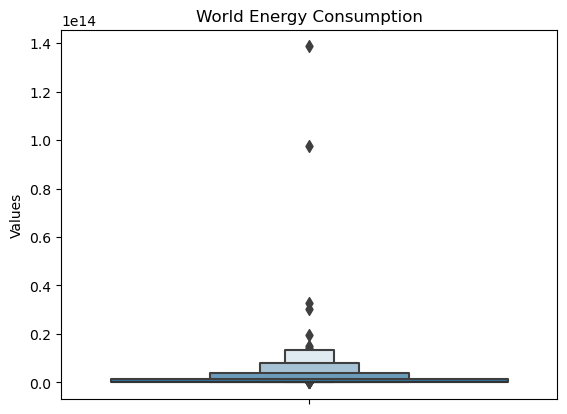

In [48]:
sns.boxenplot(y='Energy Consumption BTU', data=energy_table)
plt.title('World Energy Consumption')
plt.ylabel('Values')
plt.show()

In [49]:
#Function to remove outliers using IQR
def remove_outliers(energy_table, column, threshold=1.5):
    q1 = energy_table[column].quantile(0.25)
    q3 = energy_table[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - threshold * iqr
    upper_bound = q3 + threshold * iqr

    # Filter data to remove outliers
    energy_table_filtered = energy_table[(energy_table[column] >= lower_bound) & (energy_table[column] <= upper_bound)]

    return energy_table_filtered

# Specify the column from which you want to remove outliers
column_to_remove_outliers = 'Energy Consumption BTU'

# Remove outliers from the specified column
energy_table_filtered = remove_outliers(energy_table, column_to_remove_outliers)

print("\nOriginal DataFrame:\n")
print(energy_table)
print("\nDataFrame after removing outliers:\n")
print(energy_table_filtered)


Original DataFrame:

       #                  Country  Energy Consumption BTU  World Share  \
0      1                    China         138689472800000     23.80000   
1      2            United States          97661161460000     16.80000   
2      3                   Russia          32832743720000      5.60000   
3      4                    India          30476788610000      5.20000   
4      5                    Japan          19402928820000      3.30000   
..   ...                      ...                     ...          ...   
204  205  Saint Pierre & Miquelon              1982000000      0.00034   
205  206                    Tonga              1807000000      0.00031   
206  207             Cook Islands              1677278000      0.00029   
207  208         Falkland Islands                82900000      0.00001   
208  209                 Kiribati                46100000      0.00001   

     Per capita Yearly BTU  
0                    98342  
1                   296130  
2 

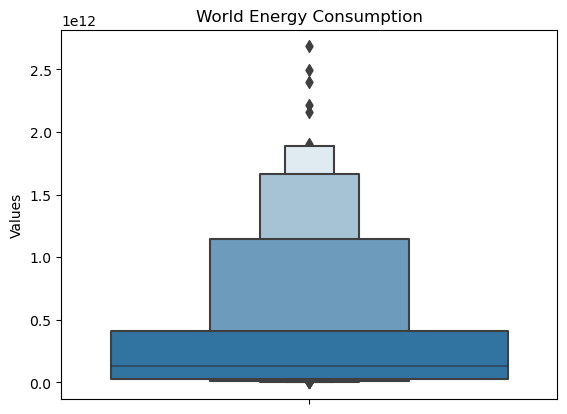

In [50]:
sns.boxenplot(y='Energy Consumption BTU', data=energy_table_filtered)
plt.title('World Energy Consumption')
plt.ylabel('Values')
plt.show()

In [51]:
energy_table_filtered.head()

,#,Country,Energy Consumption BTU,World Share,Per capita Yearly BTU
33,34,Belgium,2684685429000,0.46100,235820
34,35,Venezuela,2492568948000,0.42801,81554
35,36,Algeria,2398447784000,0.41184,58305
36,37,Sweden,2218710262000,0.38098,220587
37,38,Qatar,2159502542000,0.37081,796349


In [52]:
energy_table_filtered.isnull().sum()

#                         0
Country                   0
Energy Consumption BTU    0
World Share               0
Per capita Yearly BTU     0
dtype: int64

In [53]:
#Drop unwanted columns (#)

energy_table_filtered.drop(columns=['#'], inplace=True)
energy_table_filtered.tail()

C:\Users\ajupe\AppData\Local\Temp\ipykernel_3544\3463561154.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  energy_table_filtered.drop(columns=['#'], inplace=True)


,Country,Energy Consumption BTU,World Share,Per capita Yearly BTU
204,Saint Pierre & Miquelon,1982000000,0.00034,332718
205,Tonga,1807000000,0.00031,17142
206,Cook Islands,1677278000,0.00029,96423
207,Falkland Islands,82900000,0.00001,23041
208,Kiribati,46100000,0.00001,383


In [54]:
energy_table_filtered.head()

,Country,Energy Consumption BTU,World Share,Per capita Yearly BTU
33,Belgium,2684685429000,0.46100,235820
34,Venezuela,2492568948000,0.42801,81554
35,Algeria,2398447784000,0.41184,58305
36,Sweden,2218710262000,0.38098,220587
37,Qatar,2159502542000,0.37081,796349


**Table 2- undernourished_table**

In [55]:
undernourished_table.head()

,#,Country,Undernourished People,Percent of Population,Population (2018)
0,1,India,"194,400,000",14.20%,"1,369,003,306"
1,2,China,"121,400,000",8.57%,"1,417,069,468"
2,3,Pakistan,"40,000,000",18.20%,"219,731,479"
3,4,Nigeria,"25,600,000",12.90%,"198,387,623"
4,5,Bangladesh,"24,200,000",14.78%,"163,683,958"


In [56]:
undernourished_table.info()

<class 'pandas.core.frame.DataFrame'>
Index: 121 entries, 0 to 120
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   #                        121 non-null    object
 1   Country                  121 non-null    object
 2   Undernourished  People   121 non-null    object
 3    Percent of Population   121 non-null    object
 4   Population (2018)        121 non-null    object
dtypes: object(5)
memory usage: 5.7+ KB


In [57]:
#Removing whitespaces from column names
undernourished_table.columns = undernourished_table.columns.str.strip()
undernourished_table.columns

Index(['#', 'Country', 'Undernourished  People', 'Percent of Population',
       'Population (2018)'],
      dtype='object')

In [58]:
#Rename column name
undernourished_table.rename(columns={'Population (2018)':'Population in 2018'}, inplace=True)
undernourished_table.columns

Index(['#', 'Country', 'Undernourished  People', 'Percent of Population',
       'Population in 2018'],
      dtype='object')

In [59]:
#Removing comas from 'Undernourished  People'

undernourished_table['Undernourished  People'] = undernourished_table['Undernourished  People'].str.replace(',', '')
undernourished_table['Undernourished  People']

0      194400000
1      121400000
2       40000000
3       25600000
4       24200000
         ...    
116        50000
117        50000
118        50000
119        50000
120        50000
Name: Undernourished  People, Length: 121, dtype: object

In [60]:
#Removing comas from 'Population in 2018'

undernourished_table['Population in 2018']= undernourished_table['Population in 2018'].str.replace(',', '')
undernourished_table['Population in 2018']

0      1369003306
1      1417069468
2       219731479
3       198387623
4       163683958
          ...    
116       1322148
117       1218831
118       1295381
119       1504709
120       2113491
Name: Population in 2018, Length: 121, dtype: object

In [61]:
#Removing '%' from 'Percent of Population'

undernourished_table['Percent of Population'] = undernourished_table['Percent of Population'].str.replace('%','')
undernourished_table['Percent of Population']

0      14.20
1       8.57
2      18.20
3      12.90
4      14.78
       ...  
116     3.78
117     4.10
118     3.86
119     3.32
120     2.37
Name: Percent of Population, Length: 121, dtype: object

In [62]:
undernourished_table.info()

<class 'pandas.core.frame.DataFrame'>
Index: 121 entries, 0 to 120
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   #                       121 non-null    object
 1   Country                 121 non-null    object
 2   Undernourished  People  121 non-null    object
 3   Percent of Population   121 non-null    object
 4   Population in 2018      121 non-null    object
dtypes: object(5)
memory usage: 5.7+ KB


In [63]:
#convert undernourished_table columns to numeric value

convert_numeric = ['Undernourished  People', 'Percent of Population','Population in 2018' ]
undernourished_table[convert_numeric] = undernourished_table[convert_numeric].apply(pd.to_numeric, errors = 'coerce')
undernourished_table.info()

<class 'pandas.core.frame.DataFrame'>
Index: 121 entries, 0 to 120
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   #                       121 non-null    object 
 1   Country                 121 non-null    object 
 2   Undernourished  People  121 non-null    int64  
 3   Percent of Population   121 non-null    float64
 4   Population in 2018      121 non-null    int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ KB


In [64]:
#checking duplicate values in dataset

duplicates = undernourished_table[undernourished_table.duplicated()]
duplicates

 #no duplicate values present in dataset

,#,Country,Undernourished People,Percent of Population,Population in 2018


In [65]:
#Removing outliers
import seaborn as sns
import matplotlib.pyplot as plt

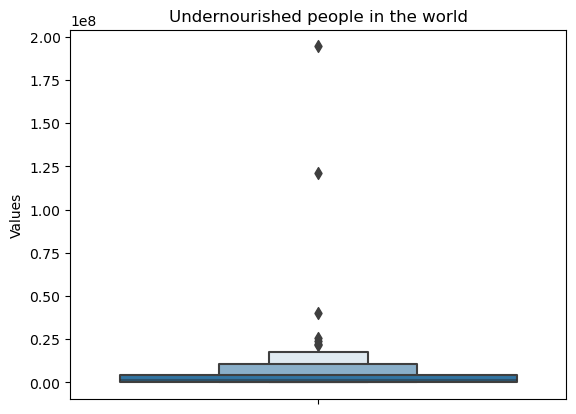

In [66]:
sns.boxenplot(y='Undernourished  People', data=undernourished_table)
plt.title('Undernourished people in the world')
plt.ylabel('Values')
plt.show()

In [67]:
#Function to remove outliers using IQR
def remove_outliers(undernourished_table, column, threshold=1.5):
    q1 = undernourished_table[column].quantile(0.25)
    q3 = undernourished_table[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - threshold * iqr
    upper_bound = q3 + threshold * iqr

    # Filter data to remove outliers
    undernourished_table_filtered = undernourished_table[(undernourished_table[column] >= lower_bound) & (undernourished_table[column] <= upper_bound)]

    return undernourished_table_filtered

# Specify the column from which you want to remove outliers
column_to_remove_outliers = 'Undernourished  People'

# Remove outliers from the specified column
undernourished_table_filtered = remove_outliers(undernourished_table, column_to_remove_outliers)

print("\nOriginal DataFrame:\n")
print(undernourished_table)
print("\nDataFrame after removing outliers:\n")
print(undernourished_table_filtered)


Original DataFrame:

       #              Country  Undernourished  People  Percent of Population  \
0      1                India               194400000                  14.20   
1      2                China               121400000                   8.57   
2      3             Pakistan                40000000                  18.20   
3      4              Nigeria                25600000                  12.90   
4      5           Bangladesh                24200000                  14.78   
..   ...                  ...                     ...                    ...   
116  117              Estonia                   50000                   3.78   
117  118               Cyprus                   50000                   4.10   
118  119            Mauritius                   50000                   3.86   
119  120  Trinidad and Tobago                   50000                   3.32   
120  121      North Macedonia                   50000                   2.37   

     Population i

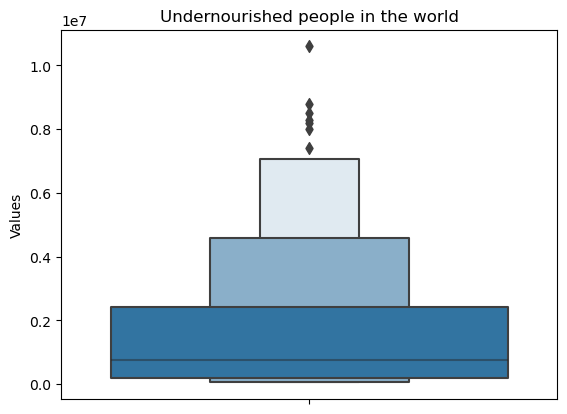

In [68]:
sns.boxenplot(y='Undernourished  People', data=undernourished_table_filtered)
plt.title('Undernourished people in the world')
plt.ylabel('Values')
plt.show()

In [69]:
undernourished_table_filtered.isnull().sum()

#                         0
Country                   0
Undernourished  People    0
Percent of Population     0
Population in 2018        0
dtype: int64

In [70]:
#Drop unwanted columns (#)
undernourished_table_filtered.drop('#', axis=1, inplace=True)
undernourished_table_filtered.tail()

C:\Users\ajupe\AppData\Local\Temp\ipykernel_3544\677761996.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  undernourished_table_filtered.drop('#', axis=1, inplace=True)


,Country,Undernourished People,Percent of Population,Population in 2018
116,Estonia,50000,3.78,1322148
117,Cyprus,50000,4.10,1218831
118,Mauritius,50000,3.86,1295381
119,Trinidad and Tobago,50000,3.32,1504709
120,North Macedonia,50000,2.37,2113491


In [71]:
undernourished_table_filtered.tail()

,Country,Undernourished People,Percent of Population,Population in 2018
116,Estonia,50000,3.78,1322148
117,Cyprus,50000,4.10,1218831
118,Mauritius,50000,3.86,1295381
119,Trinidad and Tobago,50000,3.32,1504709
120,North Macedonia,50000,2.37,2113491


**Table 3- co2emission_table**

In [296]:
co2emission_table.head()

,#,Country,"CO2 Emissions (tons, 2016)",1 Year Change,Population (2016),Per capita,Share of world
0,1,China,"10,432,751,400",-0.28%,"1,401,889,681",7.44,29.18%
1,2,United States,"5,011,686,600",-2.01%,"327,210,198",15.32,14.02%
2,3,India,"2,533,638,100",4.71%,"1,338,636,340",1.89,7.09%
3,4,Russia,"1,661,899,300",-2.13%,"145,109,157",11.45,4.65%
4,5,Japan,"1,239,592,060",-1.21%,"126,993,857",9.76,3.47%


In [297]:
co2emission_table.info()

<class 'pandas.core.frame.DataFrame'>
Index: 209 entries, 0 to 208
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   #                            209 non-null    object
 1   Country                      209 non-null    object
 2   CO2 Emissions (tons, 2016)   209 non-null    object
 3   1 Year Change                209 non-null    object
 4   Population (2016)            209 non-null    object
 5   Per capita                   209 non-null    object
 6   Share of world               209 non-null    object
dtypes: object(7)
memory usage: 13.1+ KB


In [298]:
#Removing whitespaces from column names
co2emission_table.columns = co2emission_table.columns.str.strip()
co2emission_table.columns

Index(['#', 'Country', 'CO2 Emissions (tons, 2016)', '1 Year Change',
       'Population (2016)', 'Per capita', 'Share of world'],
      dtype='object')

In [299]:
#Rename columns
co2emission_table.rename(columns={'CO2 Emissions (tons, 2016)':'CO2 Emissions tons in 2016','Population (2016)':'Populationin 2016' }, inplace=True)
co2emission_table.columns

Index(['#', 'Country', 'CO2 Emissions tons in 2016', '1 Year Change',
       'Populationin 2016', 'Per capita', 'Share of world'],
      dtype='object')

In [300]:
#Dropping unwanted columns
co2emission_table.drop(columns=['#','1 Year Change', 'Populationin 2016' ], inplace=True)
co2emission_table.head()

,Country,CO2 Emissions tons in 2016,Per capita,Share of world
0,China,"10,432,751,400",7.44,29.18%
1,United States,"5,011,686,600",15.32,14.02%
2,India,"2,533,638,100",1.89,7.09%
3,Russia,"1,661,899,300",11.45,4.65%
4,Japan,"1,239,592,060",9.76,3.47%


In [301]:
#Removing comas from CO2 Emissions tons in 2016

co2emission_table['CO2 Emissions tons in 2016']= co2emission_table['CO2 Emissions tons in 2016'].str.replace(',', '')
co2emission_table['CO2 Emissions tons in 2016']

0      10432751400
1       5011686600
2       2533638100
3       1661899300
4       1239592060
          ...     
204          30262
205          13128
206           8842
207           1953
208           1530
Name: CO2 Emissions tons in 2016, Length: 209, dtype: object

In [302]:
#Removing '%' from Share of world

co2emission_table['Share of world'] = co2emission_table['Share of world'].str.replace('%', '')
co2emission_table['Share of world']

0      29.18
1      14.02
2       7.09
3       4.65
4       3.47
       ...  
204     0.00
205     0.00
206     0.00
207     0.00
208     0.00
Name: Share of world, Length: 209, dtype: object

In [303]:
#Convert columns to numeric

convert_columns = ['CO2 Emissions tons in 2016', 'Per capita', 'Share of world']
co2emission_table[convert_columns] = co2emission_table[convert_columns].apply(pd.to_numeric, errors='coerce')
co2emission_table.info()

<class 'pandas.core.frame.DataFrame'>
Index: 209 entries, 0 to 208
Data columns (total 4 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Country                     209 non-null    object 
 1   CO2 Emissions tons in 2016  209 non-null    int64  
 2   Per capita                  209 non-null    float64
 3   Share of world              209 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 8.2+ KB


In [304]:
#checking duplicate values in dataset

duplicates = co2emission_table[co2emission_table.duplicated()]
duplicates

 #no duplicate values present in dataset

,Country,CO2 Emissions tons in 2016,Per capita,Share of world


In [305]:
#Removing outliers
import seaborn as sns
import matplotlib.pyplot as plt

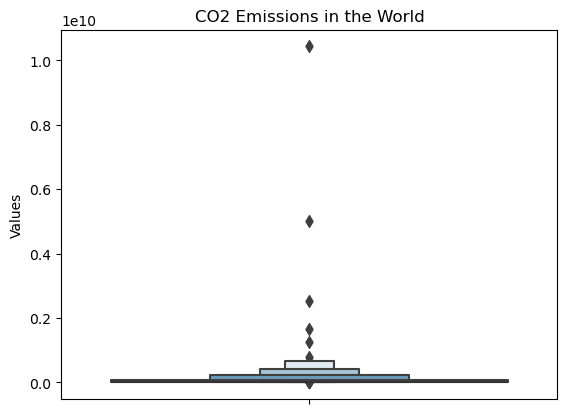

In [306]:
sns.boxenplot(y='CO2 Emissions tons in 2016', data=co2emission_table)
plt.title('CO2 Emissions in the World')
plt.ylabel('Values')
plt.show()

In [307]:
#Function to remove outliers using IQR
def remove_outliers(co2emission_table, column, threshold=1.5):
    q1 = co2emission_table[column].quantile(0.25)
    q3 = co2emission_table[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - threshold * iqr
    upper_bound = q3 + threshold * iqr

    # Filter data to remove outliers
    co2emission_table_filtered = co2emission_table[(co2emission_table[column] >= lower_bound) & (co2emission_table[column] <= upper_bound)]

    return co2emission_table_filtered

# Specify the column from which you want to remove outliers
column_to_remove_outliers = 'CO2 Emissions tons in 2016'

# Remove outliers from the specified column
co2emission_table_filtered = remove_outliers(co2emission_table, column_to_remove_outliers)

print("\nOriginal DataFrame:\n")
print(co2emission_table)
print("\nDataFrame after removing outliers:\n")
print(co2emission_table_filtered)


Original DataFrame:

                     Country  CO2 Emissions tons in 2016  Per capita  \
0                      China                 10432751400        7.44   
1              United States                  5011686600       15.32   
2                      India                  2533638100        1.89   
3                     Russia                  1661899300       11.45   
4                      Japan                  1239592060        9.76   
..                       ...                         ...         ...   
204                 Anguilla                       30262        2.04   
205             Saint Helena                       13128        2.38   
206  Saint Pierre & Miquelon                        8842        1.48   
207           Faeroe Islands                        1953        0.04   
208                Greenland                        1530        0.03   

     Share of world  
0             29.18  
1             14.02  
2              7.09  
3              4.65  
4  

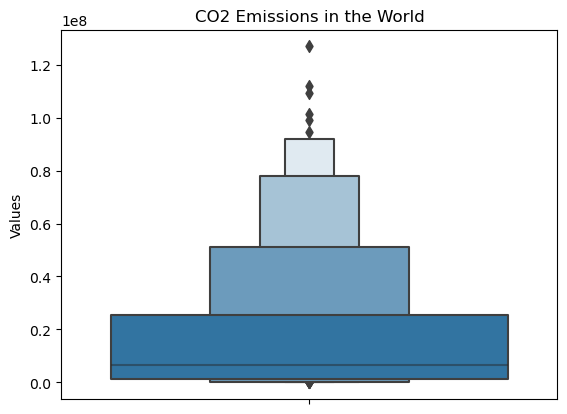

In [308]:
sns.boxenplot(y='CO2 Emissions tons in 2016', data=co2emission_table_filtered)
plt.title('CO2 Emissions in the World')
plt.ylabel('Values')
plt.show()

In [309]:
co2emission_table_filtered.isnull().sum()

Country                       0
CO2 Emissions tons in 2016    0
Per capita                    0
Share of world                0
dtype: int64

In [310]:
co2emission_table_filtered.tail()

,Country,CO2 Emissions tons in 2016,Per capita,Share of world
204,Anguilla,30262,2.04,0.0
205,Saint Helena,13128,2.38,0.0
206,Saint Pierre & Miquelon,8842,1.48,0.0
207,Faeroe Islands,1953,0.04,0.0
208,Greenland,1530,0.03,0.0


### Task 4: Documentation  

### a) 
I have executed a comprehensive data cleansing process using a Python script to prepare all three datasets for further analysis. The data cleansing includes the 5 data-cleaning tasks.
- Correcting possible typos

Renamed column names and removed whitespaces and symbols to ensure consistency and clarity in variable labels. 
- Removing unwanted observations 

Checked for duplicate values, null values, and removed irrelevant characters such as commas and percentage signs. 
- Removing irrelevant data 

Dropped unnecessary columns that are not relevant to the analysis.
- Removing outliers 

Applied the Interquartile Range (IQR) method to identify and remove outliers. 
- Data type conversion 

Converted data types from object to integer or floating values as needed. 
- Encoding/decoding and re-coding variables

Converted data types from object to integer or floating values as needed, without requiring encoding or decoding in the cleansing process.

The cleaned datasets provide a structured, accurate foundation for analysis, enhancing marketing strategies by delivering precise insights into customer behaviour and preferences.


### b)

I have approached in a systematic way to handling various challenges encountered during the data preparation and cleaning process, highlighting consistency, accuracy, and reliability in the datasets. 

1. Inconsistent Dataset Formats:

Encountered inconsistency and varied formats in the dataset. To resolve these issues, I have applied the strip, rename, and replace functions to standardize the dataset.

2. Identification and Removal of Unwanted Columns:

Discovered irrelevant columns that needed removal. I have approached by utilizing the drop function to eliminate unnecessary columns.

3. Handling Outliers with IQR:

Identified outliers in the dataset. To overcome these issues, I have used the Interquartile Range (IQR) function to effectively identify and remove outliers.

4. Data Type Conversion:

Found that numeric values were stored as objects. To resolve this issue by using the pd.to_numeric function in Pandas to convert these values to integer or float.

5. Ensuring Data Integrity:

Checked for missing and duplicated values to ensure data integrity. I have ensured the data integrity by using the isnull and duplicated functions to confirm the absence of missing or duplicate values.



### Task 5: Store Datasets 
I have written Python code to save the transformed datasets in CSV format.

In [311]:
energy_table_filtered = energy_table.to_csv('Enery_World.csv')
print('\nenergy_table_filtered saves as Energy_World.csv\n')


energy_table_filtered saves as Energy_World.csv



In [312]:
undernourished_table_filtered =undernourished_table.to_csv('Undernourished_World.csv')
print('\nundernourished_table_filtered saves as Undernourished_World.csv\n')


undernourished_table_filtered saves as Undernourished_World.csv



In [313]:
co2emission_table_filtered = co2emission_table.to_csv('CO2Emission_World.csv')
print('\nco2emission_table_filtered saved as CO2Emission_World.csv\n')


co2emission_table_filtered saved as CO2Emission_World.csv



### Task 6: Merge Data 

I have created Python code to import three datasets into separate DataFrames. Following that, I merged them into a unified DataFrame using common columns as merge key (Key='Country), with the inner merge option. The inner merge ensures that only the rows with matching keys in all three tables are included, providing a dataset focused exclusively on the overlapping information. This approach is advantageous as it helps eliminate non-matching rows, which create a precise and consolidated dataset for analysis.

In [314]:
#Importing libraries

import pandas as pd
import numpy as np

In [315]:
#importing datasets
energy_world = pd.read_csv('Enery_World.csv')
energy_world.head()

,Unnamed: 0,#,Country,Energy Consumption BTU,World Share,Per capita Yearly BTU
0,0,1,China,138689472800000,23.8,98342
1,1,2,United States,97661161460000,16.8,296130
2,2,3,Russia,32832743720000,5.6,225728
3,3,4,India,30476788610000,5.2,22505
4,4,5,Japan,19402928820000,3.3,153186


In [316]:
undernourished_world = pd.read_csv('Undernourished_World.csv')
undernourished_world.head()

,Unnamed: 0,#,Country,Undernourished People,Percent of Population,Population in 2018
0,0,1,India,194400000,14.20,1369003306
1,1,2,China,121400000,8.57,1417069468
2,2,3,Pakistan,40000000,18.20,219731479
3,3,4,Nigeria,25600000,12.90,198387623
4,4,5,Bangladesh,24200000,14.78,163683958


In [317]:
#'CO2Emission_World.csv'

co2emission_world = pd.read_csv('CO2Emission_World.csv')
co2emission_world.head()

,Unnamed: 0,Country,CO2 Emissions tons in 2016,Per capita,Share of world
0,0,China,10432751400,7.44,29.18
1,1,United States,5011686600,15.32,14.02
2,2,India,2533638100,1.89,7.09
3,3,Russia,1661899300,11.45,4.65
4,4,Japan,1239592060,9.76,3.47


In [318]:
#Merging first two datasets tables with key='Country' (energy_world & undernourished_world)
merged_2column = pd.merge(energy_world, undernourished_world, on='Country', how='inner')
merged_2column.head()

,Unnamed: 0_x,#_x,Country,Energy Consumption BTU,World Share,Per capita Yearly BTU,Unnamed: 0_y,#_y,Undernourished People,Percent of Population,Population in 2018
0,0,1,China,138689472800000,23.80000,98342,1,2,121400000,8.57,1417069468
1,3,4,India,30476788610000,5.20000,22505,0,1,194400000,14.20,1369003306
2,9,10,Iran,11599267500000,2.00000,137261,31,32,4000000,4.67,85617562
3,10,11,Saudi Arabia,10997456810000,1.90000,321628,43,44,2300000,6.57,35018133
4,13,14,Mexico,7868848622000,1.35118,64058,27,28,4700000,3.79,124013861


In [319]:
#Merge last table co2emission_world
merged_df = pd.merge(merged_2column, co2emission_world, on='Country', how='inner')
merged_df.head()

,Unnamed: 0_x,#_x,Country,Energy Consumption BTU,World Share,Per capita Yearly BTU,Unnamed: 0_y,#_y,Undernourished People,Percent of Population,Population in 2018,Unnamed: 0,CO2 Emissions tons in 2016,Per capita,Share of world
0,0,1,China,138689472800000,23.80000,98342,1,2,121400000,8.57,1417069468,0,10432751400,7.44,29.18
1,3,4,India,30476788610000,5.20000,22505,0,1,194400000,14.20,1369003306,2,2533638100,1.89,7.09
2,9,10,Iran,11599267500000,2.00000,137261,31,32,4000000,4.67,85617562,7,642560030,7.71,1.80
3,10,11,Saudi Arabia,10997456810000,1.90000,321628,43,44,2300000,6.57,35018133,10,517079407,15.47,1.45
4,13,14,Mexico,7868848622000,1.35118,64058,27,28,4700000,3.79,124013861,12,441412750,3.63,1.23


In [320]:
#Drop unwanted index columns

merged_df.drop(columns=['Unnamed: 0_x', '#_x', 'Unnamed: 0_y', '#_y', 'Unnamed: 0'], inplace=True)
merged_df.head()

,Country,Energy Consumption BTU,World Share,Per capita Yearly BTU,Undernourished People,Percent of Population,Population in 2018,CO2 Emissions tons in 2016,Per capita,Share of world
0,China,138689472800000,23.80000,98342,121400000,8.57,1417069468,10432751400,7.44,29.18
1,India,30476788610000,5.20000,22505,194400000,14.20,1369003306,2533638100,1.89,7.09
2,Iran,11599267500000,2.00000,137261,4000000,4.67,85617562,642560030,7.71,1.80
3,Saudi Arabia,10997456810000,1.90000,321628,2300000,6.57,35018133,517079407,15.47,1.45
4,Mexico,7868848622000,1.35118,64058,4700000,3.79,124013861,441412750,3.63,1.23


### Task 7: Indexing  

###### a.	Set a specific column as the index. 

In [321]:
merged_df.columns

Index(['Country', 'Energy Consumption BTU', 'World Share',
       'Per capita Yearly BTU', 'Undernourished  People',
       'Percent of Population', 'Population in 2018',
       'CO2 Emissions tons in 2016', 'Per capita', 'Share of world'],
      dtype='object')

In [322]:
merged_df.set_index('Country', inplace=True)
print('\nDataset index set as Country: \n')
merged_df.head(2)


Dataset index set as Country: 



,Energy Consumption BTU,World Share,Per capita Yearly BTU,Undernourished People,Percent of Population,Population in 2018,CO2 Emissions tons in 2016,Per capita,Share of world
Country,,,,,,,,,
China,138689472800000,23.8,98342,121400000,8.57,1417069468,10432751400,7.44,29.18
India,30476788610000,5.2,22505,194400000,14.20,1369003306,2533638100,1.89,7.09


###### b.	Reset the index to the default integer-based index. 

In [323]:
merged_df.reset_index(inplace=True)
print('\nIndex removed:\n')
merged_df.tail(2)


Index removed:



,Country,Energy Consumption BTU,World Share,Per capita Yearly BTU,Undernourished People,Percent of Population,Population in 2018,CO2 Emissions tons in 2016,Per capita,Share of world
119,Sao Tome & Principe,2366491000,0.00041,11375,50000,23.66,211344,56185,0.27,0.0
120,Kiribati,46100000,0.00001,383,50000,40.90,122261,52818,0.45,0.0


###### c.	Create a new DataFrame by selecting rows based on a conditional index. 

In [324]:
top_10_countries = merged_df.nlargest(10, 'Population in 2018')
print('\nTop 10 Populated Countries in The World:\n')
top_10_countries


Top 10 Populated Countries in The World:



,Country,Energy Consumption BTU,World Share,Per capita Yearly BTU,Undernourished People,Percent of Population,Population in 2018,CO2 Emissions tons in 2016,Per capita,Share of world
0,China,138689472800000,23.80000,98342,121400000,8.57,1417069468,10432751400,7.44,29.18
1,India,30476788610000,5.20000,22505,194400000,14.20,1369003306,2533638100,1.89,7.09
5,Indonesia,7158688937000,1.22924,27065,22000000,8.24,267066843,530035650,2.02,1.48
15,Pakistan,3183442105000,0.54664,14712,40000000,18.20,219731479,178013820,0.83,0.50
24,Nigeria,1540259766000,0.26448,7960,25600000,12.90,198387623,82634214,0.44,0.23
26,Bangladesh,1417359711000,0.24338,8760,24200000,14.78,163683958,74476230,0.47,0.21
4,Mexico,7868848622000,1.35118,64058,4700000,3.79,124013861,441412750,3.63,1.23
48,Ethiopia,323534822000,0.05560,2990,21600000,19.44,111129438,10438855,0.10,0.03
19,Philippines,1832128988000,0.31460,17165,13900000,12.80,108568836,126922662,1.21,0.35
10,Egypt,4012356526000,0.68897,39418,4400000,4.24,103740765,219377350,2.20,0.61


###### d.	Perform multi-level indexing by setting multiple columns as the index. 

In [325]:
top_10_countries.set_index(['Country', 'Population in 2018'], inplace=True)
print('\nMulti-level indexing with columns Country and Population in 2018:\n')
top_10_countries


Multi-level indexing with columns Country and Population in 2018:



,,Energy Consumption BTU,World Share,Per capita Yearly BTU,Undernourished People,Percent of Population,CO2 Emissions tons in 2016,Per capita,Share of world
Country,Population in 2018,,,,,,,,
China,1417069468,138689472800000,23.80000,98342,121400000,8.57,10432751400,7.44,29.18
India,1369003306,30476788610000,5.20000,22505,194400000,14.20,2533638100,1.89,7.09
Indonesia,267066843,7158688937000,1.22924,27065,22000000,8.24,530035650,2.02,1.48
Pakistan,219731479,3183442105000,0.54664,14712,40000000,18.20,178013820,0.83,0.50
Nigeria,198387623,1540259766000,0.26448,7960,25600000,12.90,82634214,0.44,0.23
Bangladesh,163683958,1417359711000,0.24338,8760,24200000,14.78,74476230,0.47,0.21
Mexico,124013861,7868848622000,1.35118,64058,4700000,3.79,441412750,3.63,1.23
Ethiopia,111129438,323534822000,0.05560,2990,21600000,19.44,10438855,0.10,0.03
Philippines,108568836,1832128988000,0.31460,17165,13900000,12.80,126922662,1.21,0.35


### Task 8: Sorting  
I have developed a Python script to sort the merged DataFrame based on the 'Undernourished people in the world' column in ascending order. This allows me to analyze the data by examining the countries with the lowest to highest instances of undernourishment. Additionally, I have applied the descending order function to the 'Population ranking in the world year 2018' column, providing a summary that aids in understanding the global population distribution. These two approaches gives a crisp summary of both undernourishment and population across countries.

In [326]:
merged_df.columns

Index(['Country', 'Energy Consumption BTU', 'World Share',
       'Per capita Yearly BTU', 'Undernourished  People',
       'Percent of Population', 'Population in 2018',
       'CO2 Emissions tons in 2016', 'Per capita', 'Share of world'],
      dtype='object')

In [327]:
healthy_country = merged_df.sort_values(by='Undernourished  People', ascending=True)
print('\nUndernourished people in the world by country lowest to heighst:\n')
healthy_country.head()


Undernourished people in the world by country lowest to heighst:



,Country,Energy Consumption BTU,World Share,Per capita Yearly BTU,Undernourished People,Percent of Population,Population in 2018,CO2 Emissions tons in 2016,Per capita,Share of world
60,Brunei,176864953000,0.03040,411050,50000,11.51,434274,7672127,18.01,0.02
72,Cyprus,117196038000,0.02010,96975,50000,4.10,1218831,6872427,5.74,0.02
74,North Macedonia,100005786000,0.01720,47352,50000,2.37,2113491,8896732,4.22,0.02
80,Mauritius,90076344000,0.01547,69571,50000,3.86,1295381,3192307,2.47,0.01
81,Estonia,87785565000,0.01507,66628,50000,3.78,1322148,22402414,17.02,0.06


In [328]:
population_ranking = merged_df.sort_values(by='Population in 2018', ascending=False)
print('\nPopulation ranking in the world year 2018:\n')
population_ranking.head()


Population ranking in the world year 2018:



,Country,Energy Consumption BTU,World Share,Per capita Yearly BTU,Undernourished People,Percent of Population,Population in 2018,CO2 Emissions tons in 2016,Per capita,Share of world
0,China,138689472800000,23.80000,98342,121400000,8.57,1417069468,10432751400,7.44,29.18
1,India,30476788610000,5.20000,22505,194400000,14.20,1369003306,2533638100,1.89,7.09
5,Indonesia,7158688937000,1.22924,27065,22000000,8.24,267066843,530035650,2.02,1.48
15,Pakistan,3183442105000,0.54664,14712,40000000,18.20,219731479,178013820,0.83,0.50
24,Nigeria,1540259766000,0.26448,7960,25600000,12.90,198387623,82634214,0.44,0.23


### Task 9: Summary Statistics 
I have created a python code to analyse summary statistics on merged DataFrame using decribe function, bar plot, pie chart, heatmap and correlation. from the below summary statistics i have  identified  key  findings contained in this data.

In [329]:
merged_df.describe()

,Energy Consumption BTU,World Share,Per capita Yearly BTU,Undernourished People,Percent of Population,Population in 2018,CO2 Emissions tons in 2016,Per capita,Share of world
count,1.210000e+02,121.000000,121.000000,1.210000e+02,121.000000,1.210000e+02,1.210000e+02,121.000000,121.000000
mean,2.376824e+12,0.407897,58946.768595,6.215289e+06,15.973884,4.860680e+07,1.640571e+08,3.297355,0.458512
std,1.293532e+13,2.219377,98224.287428,2.124191e+07,13.541476,1.803031e+08,9.746188e+08,5.013859,2.726071
min,4.610000e+07,0.000010,323.000000,5.000000e+04,2.190000,7.082300e+04,5.281800e+04,0.090000,0.000000
25%,4.814699e+10,0.008270,8623.000000,2.000000e+05,6.430000,2.444916e+06,2.338717e+06,0.420000,0.010000
50%,1.768650e+11,0.030400,30025.000000,1.200000e+06,11.510000,1.076553e+07,8.896732e+06,1.640000,0.020000
75%,8.194336e+11,0.140700,65291.000000,4.400000e+06,19.520000,3.127353e+07,5.769288e+07,3.700000,0.160000
max,1.386895e+14,23.800000,611270.000000,1.944000e+08,70.600000,1.417069e+09,1.043275e+10,25.070000,29.180000


In [330]:
import matplotlib.pyplot as plt
import seaborn as sns

In [332]:
top_10_countries.columns

Index(['Energy Consumption BTU', 'World Share', 'Per capita Yearly BTU',
       'Undernourished  People', 'Percent of Population',
       'CO2 Emissions tons in 2016', 'Per capita', 'Share of world'],
      dtype='object')

In [333]:
top_10_countries.reset_index(inplace=True)
print('\nIndex removed:\n')
top_10_countries.tail(2)


Index removed:



,Country,Population in 2018,Energy Consumption BTU,World Share,Per capita Yearly BTU,Undernourished People,Percent of Population,CO2 Emissions tons in 2016,Per capita,Share of world
8,Philippines,108568836,1832128988000,0.31460,17165,13900000,12.80,126922662,1.21,0.35
9,Egypt,103740765,4012356526000,0.68897,39418,4400000,4.24,219377350,2.20,0.61


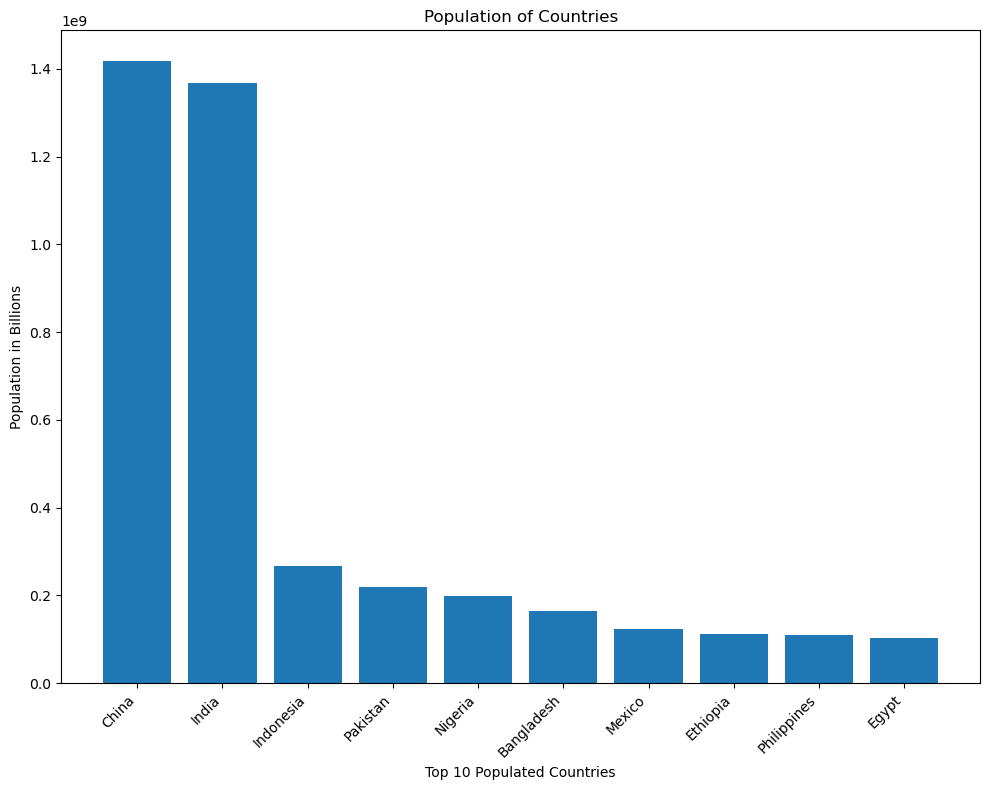

In [334]:
# Bar Plotting
plt.figure(figsize=(10, 8))
plt.bar(top_10_countries['Country'], top_10_countries['Population in 2018'])
plt.xlabel('Top 10 Populated Countries')
plt.ylabel('Population in Billions')
plt.title('Population of Countries')
plt.xticks(rotation=45, ha='right')  # Rotate country names for better visibility
plt.tight_layout()

# Show the plot
plt.show()

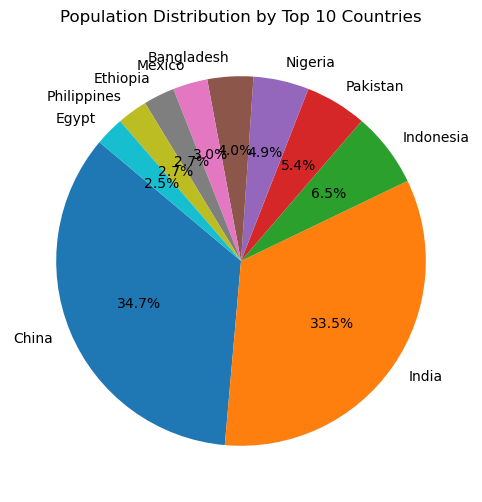

In [335]:
# Plotting as a Pie Chart
plt.figure(figsize=(10, 6))
plt.pie(top_10_countries['Population in 2018'], labels=top_10_countries['Country'], autopct='%1.1f%%', startangle=140)
plt.title('Population Distribution by Top 10 Countries')

# Show the plot
plt.show()

In [336]:
top_10_countries.columns

Index(['Country', 'Population in 2018', 'Energy Consumption BTU',
       'World Share', 'Per capita Yearly BTU', 'Undernourished  People',
       'Percent of Population', 'CO2 Emissions tons in 2016', 'Per capita',
       'Share of world'],
      dtype='object')

C:\Users\ajupe\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


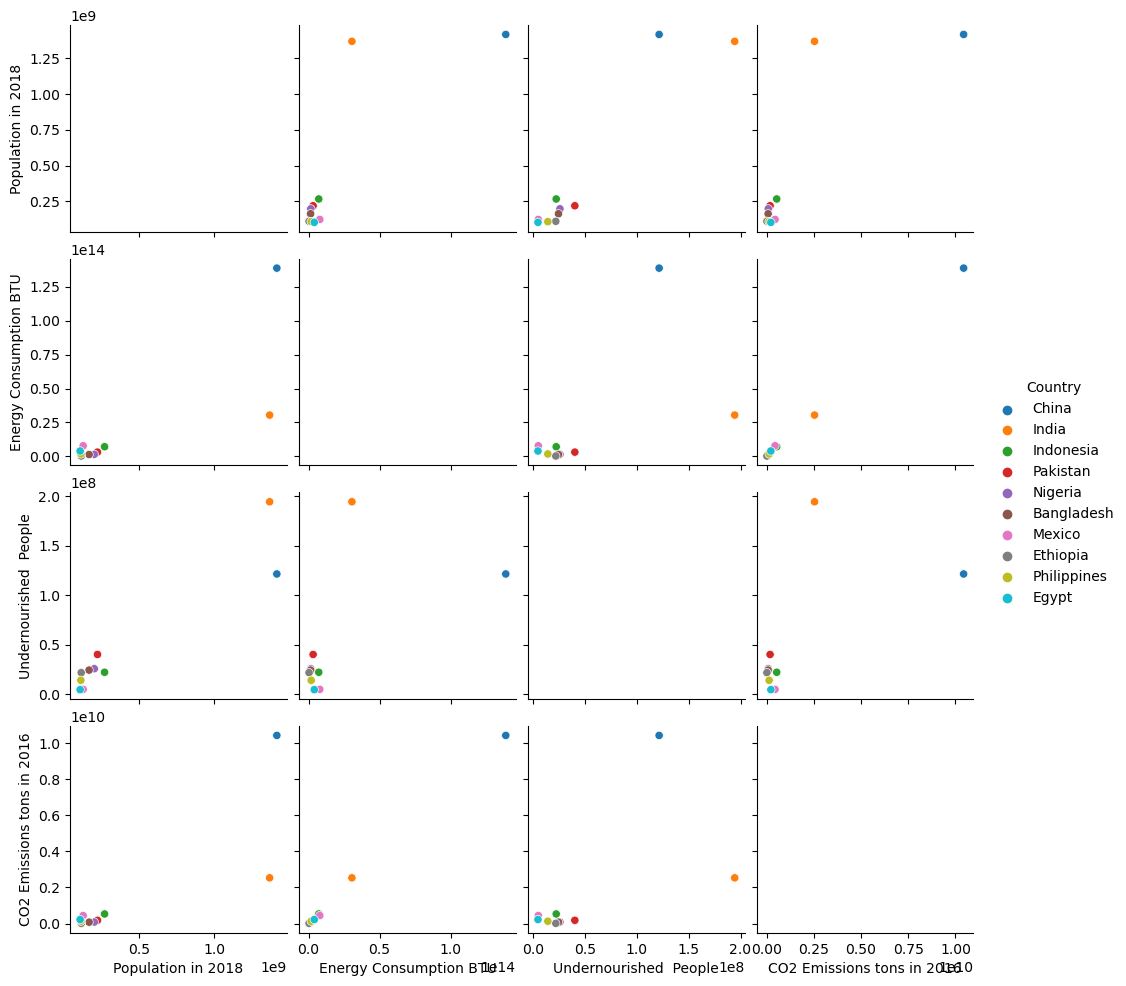

In [337]:
# Specify the columns for the pairplot
columns_for_pairplot = ['Country', 'Population in 2018', 'Energy Consumption BTU',
       'Undernourished  People',
       'CO2 Emissions tons in 2016']
#sns.pairplot(data=dataset[columns_for_pairplot])
sns.pairplot(data = top_10_countries[columns_for_pairplot], hue = 'Country')
# Show the plot
plt.show()

C:\Users\ajupe\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


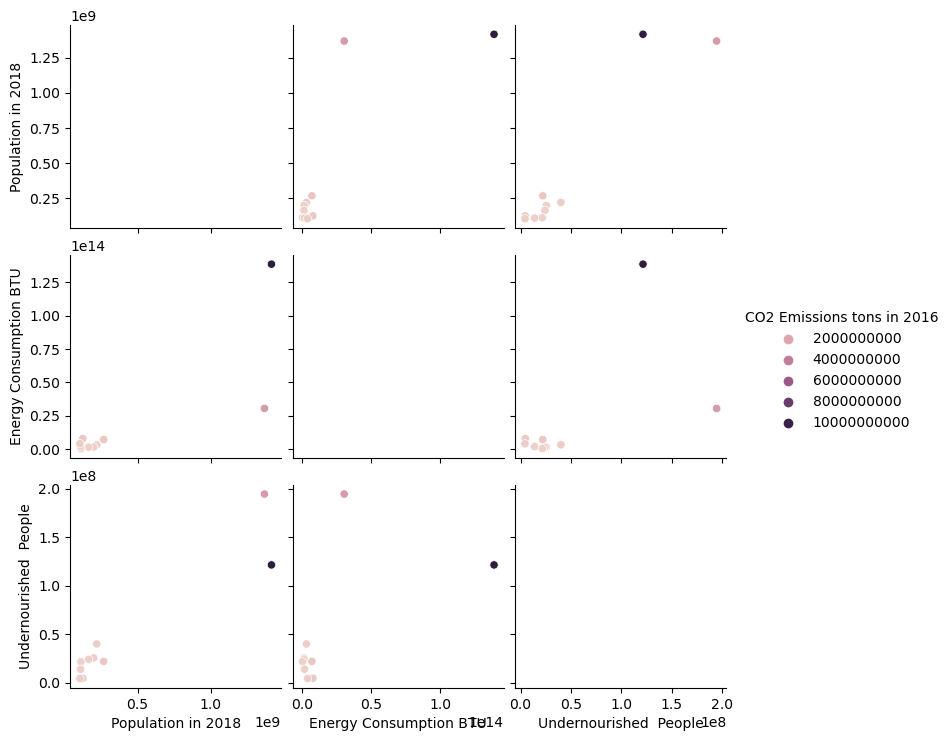

In [338]:
# Specify the columns for the pairplot
columns_for_pairplot = ['Country', 
        'Population in 2018', 'Energy Consumption BTU',
       'Undernourished  People',
       'CO2 Emissions tons in 2016']
#sns.pairplot(data=dataset[columns_for_pairplot])
sns.pairplot(data = top_10_countries[columns_for_pairplot], hue =  'CO2 Emissions tons in 2016')
# Show the plot
plt.show()

C:\Users\ajupe\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


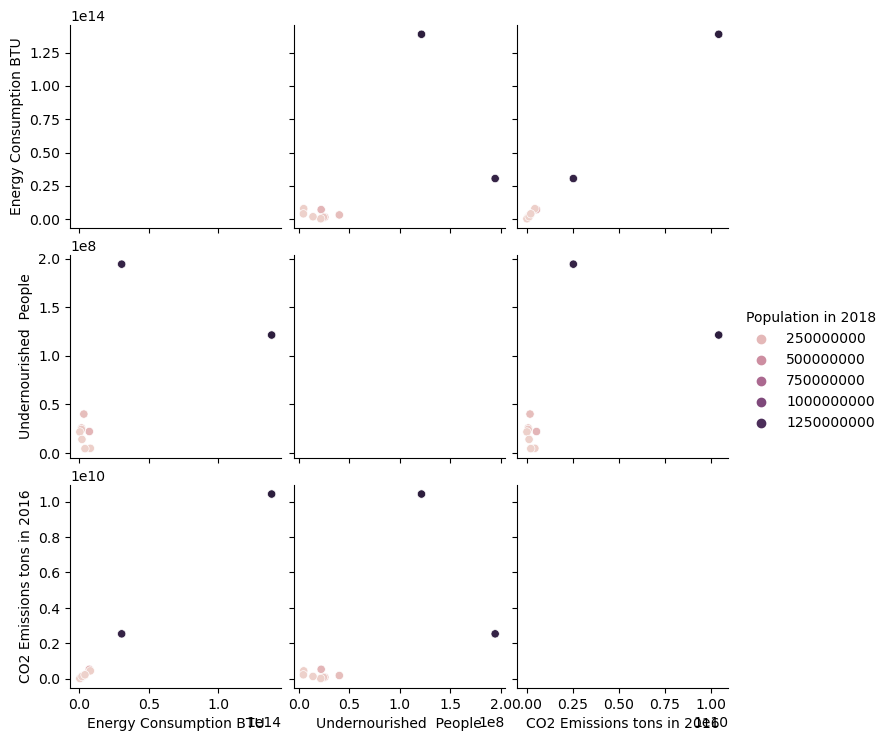

In [339]:
# Specify the columns for the pairplot
columns_for_pairplot = ['Country', 'Population in 2018', 
        'Energy Consumption BTU',
       'Undernourished  People',
       'CO2 Emissions tons in 2016']
#sns.pairplot(data=dataset[columns_for_pairplot])
sns.pairplot(data = top_10_countries[columns_for_pairplot], hue =  'Population in 2018')
# Show the plot
plt.show()

C:\Users\ajupe\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


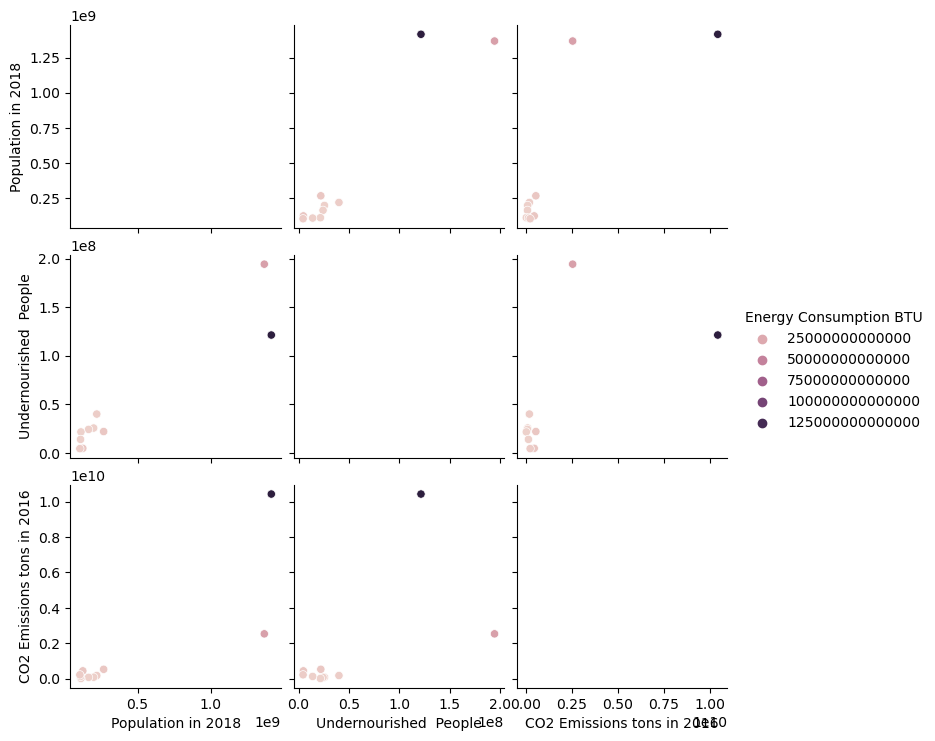

In [340]:
# Specify the columns for the pairplot
columns_for_pairplot = ['Country', 'Population in 2018', 
        'Energy Consumption BTU',
       'Undernourished  People',
       'CO2 Emissions tons in 2016']
#sns.pairplot(data=dataset[columns_for_pairplot])
sns.pairplot(data = top_10_countries[columns_for_pairplot], hue =  'Energy Consumption BTU')
# Show the plot
plt.show()

C:\Users\ajupe\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


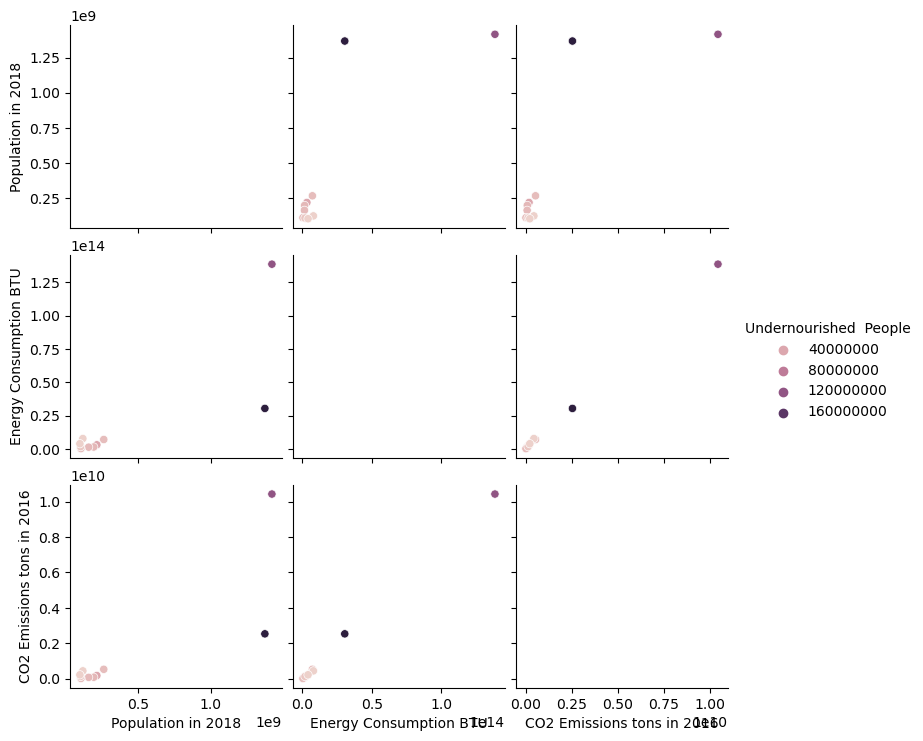

In [341]:
# Specify the columns for the pairplot
columns_for_pairplot = ['Country', 'Population in 2018', 'Energy Consumption BTU',
                        'Undernourished  People','CO2 Emissions tons in 2016']
#sns.pairplot(data=dataset[columns_for_pairplot])
sns.pairplot(data = top_10_countries[columns_for_pairplot], hue =  'Undernourished  People')
# Show the plot
plt.show()

In [342]:
merged_df.columns

Index(['Country', 'Energy Consumption BTU', 'World Share',
       'Per capita Yearly BTU', 'Undernourished  People',
       'Percent of Population', 'Population in 2018',
       'CO2 Emissions tons in 2016', 'Per capita', 'Share of world'],
      dtype='object')

In [343]:
merged_df_final1 = merged_df.drop(columns=['Country', 'World Share',
       'Per capita Yearly BTU', 'Percent of Population', 'Per capita', 'Share of world'], axis =1)
merged_df_final1.columns

Index(['Energy Consumption BTU', 'Undernourished  People',
       'Population in 2018', 'CO2 Emissions tons in 2016'],
      dtype='object')

<Axes: >

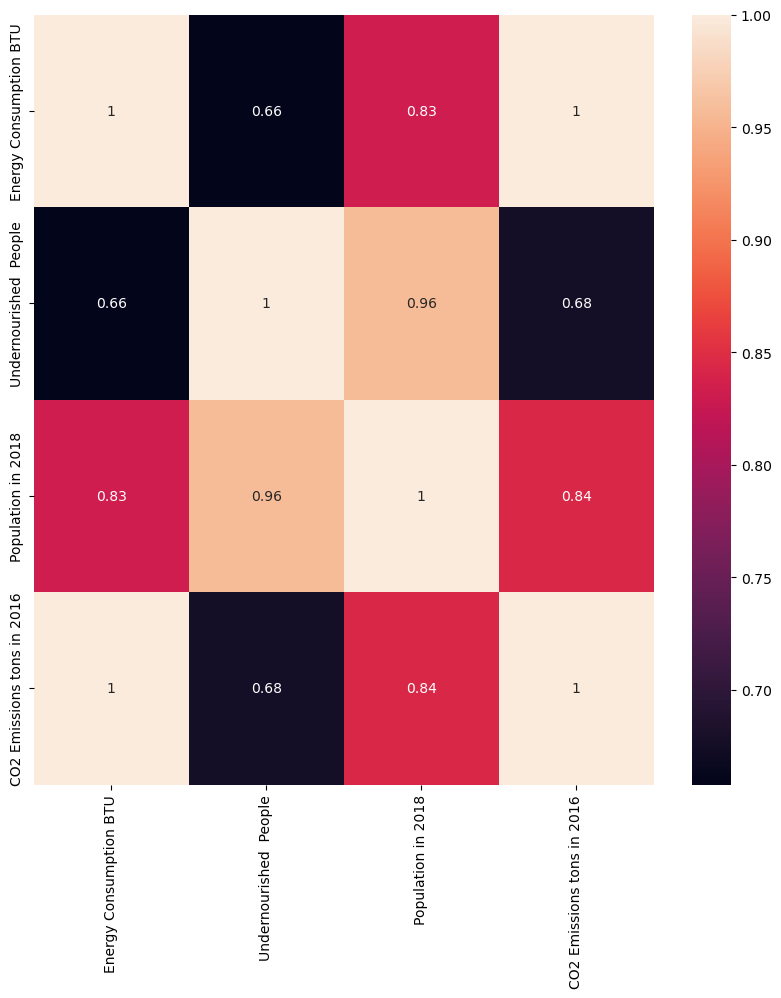

In [344]:
#plot heatmap
#sns.heatmap(df.corr().abs(), annot=True)
plt.figure(figsize=(10,10))
sns.heatmap(merged_df_final1.corr().abs(), annot=True)


Correlations Summary Report:

Population in 2018            1.000000
Undernourished  People        0.956773
CO2 Emissions tons in 2016    0.844386
Energy Consumption BTU        0.831806
Name: Population in 2018, dtype: float64


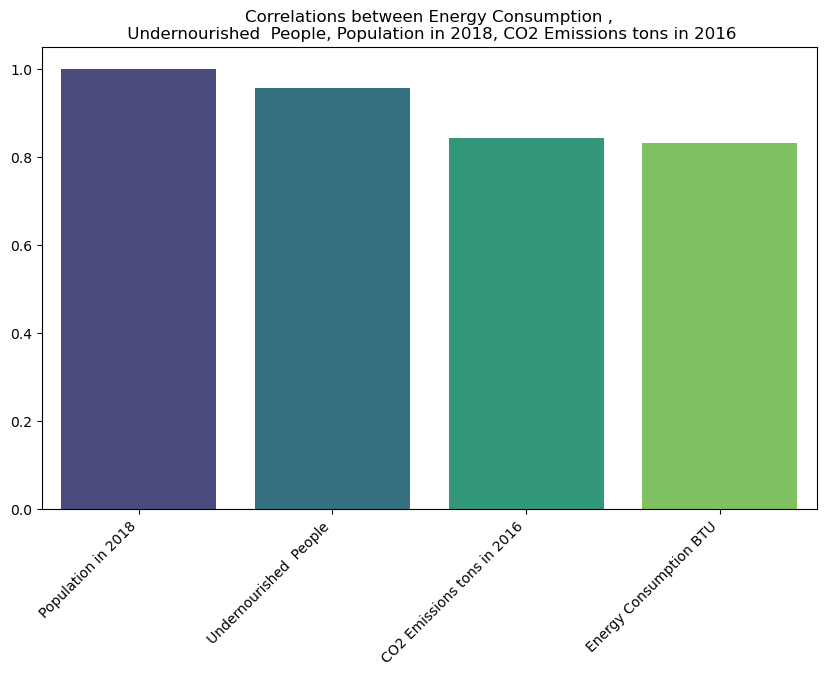

In [345]:
# Calculate correlation matrix
correlation_matrix = merged_df_final1.corr()
# Extract correlations between 'Energy Consumption BTU', 'Undernourished  People','Population in 2018',and  'CO2 Emissions tons in 2016'

satisfaction_correlations = correlation_matrix['Population in 2018'].sort_values(ascending=False)
# Display the correlations
print("\nCorrelations Summary Report:\n")
print(satisfaction_correlations)
# Plot the correlations
plt.figure(figsize=(10, 6))
sns.barplot(x=satisfaction_correlations.index, y=satisfaction_correlations.values, palette="viridis")
plt.xticks(rotation=45, ha="right")
plt.title("Correlations between Energy Consumption ,\n Undernourished  People, Population in 2018, CO2 Emissions tons in 2016")
plt.show()

## Summary Statistics:
The Correlations Summary Report indicates strong correlations with key variables in the dataset. especially, there is a perfect positive correlation (1.0) between the 'Population in 2018' and 'Undernourished People' columns. Additionally, a strong positive correlation is observed between 'Population in 2018' and 'CO2 Emissions tons in 2016' (0.8444), as well as 'Population in 2018' and 'Energy Consumption BTU' (0.8318). These findings highlight the correlation of population size with undernourishment, CO2 emissions, and energy consumption. It is important to recognize these correlation links when  making policies, as they can influence each other significantly.

### Task 10: Slicing  

I have created a Python script to slice and dispayed the top 5 highly populated countries in the world from the DataFrame. This set of data includes essential columns such as undernourished people and CO2 emissions for these countries. Upon analyzing this dataset, a noticable trend appears, indicating a higher rate of undernourishment in the most populated countries. Additionally, it became evident that these highly populated nations contribute more to CO2 emissions compared to their less populated countries. Addressing these challenges globally required a collaborative efforts, with developed countries taking the lead in supporting highly populated nations. Initiatives should focus on promoting environment friendly energy usage and production, coupled with enhanced agricultural development to reduce the percentage of  undernourishment among their populations. 

In [346]:
top_10_countries.reset_index(inplace=True)

In [347]:
selected_portion = top_10_countries.loc[0:4, 
        ['Country', 'Population in 2018',
         'Undernourished  People',
       'CO2 Emissions tons in 2016',]]
print('\nTop 5 Highly Populated Countries in The World:\n')
selected_portion


Top 5 Highly Populated Countries in The World:



,Country,Population in 2018,Undernourished People,CO2 Emissions tons in 2016
0,China,1417069468,121400000,10432751400
1,India,1369003306,194400000,2533638100
2,Indonesia,267066843,22000000,530035650
3,Pakistan,219731479,40000000,178013820
4,Nigeria,198387623,25600000,82634214


### Task 11: Data Import  

In [199]:
#Installing pymongo
!pip install pandas pymongo

  Obtaining dependency information for pymongo from https://files.pythonhosted.org/packages/c8/1a/1ba5578cc3acc8ef0dfd6eb9385f9c4b0fe3039665af93bcf062c34fcdb6/pymongo-4.6.1-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for dnspython<3.0.0,>=1.16.0 from https://files.pythonhosted.org/packages/b6/83/4a684a63d395007670bc95c1947c07045fe66141574e2f7e9e347df8499a/dnspython-2.5.0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/472.7 kB ? eta -:--:--
   ---------------- ----------------------- 194.6/472.7 kB 5.9 MB/s eta 0:00:01
   ---------------------------------------- 472.7/472.7 kB 7.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/305.4 kB ? eta -:--:--
   ---------------------------------------- 305.4/305.4 kB 9.2 MB/s eta 0:00:00


In [200]:
#import libraries

import pymongo
import pandas as pd
import json

In [202]:
#connect to mongodb
client = pymongo.MongoClient("mongodb://localhost:27017")

In [206]:
#create a new collection
collection_name = "Assessment_1"

#convert dataframe to a list of dictionaries
data_list = merged_df.to_dict(orient='records')

In [207]:
#print result
data_list

[{'Country': 'China',
  'Energy Consumption BTU': 138689472800000,
  'World Share': 23.8,
  'Per capita Yearly BTU': 98342,
  'Undernourished  People': 121400000,
  'Percent of Population': 8.57,
  'Population in 2018': 1417069468,
  'CO2 Emissions tons in 2016': 10432751400,
  'Per capita': 7.44,
  'Share of world': 29.18},
 {'Country': 'India',
  'Energy Consumption BTU': 30476788610000,
  'World Share': 5.2,
  'Per capita Yearly BTU': 22505,
  'Undernourished  People': 194400000,
  'Percent of Population': 14.2,
  'Population in 2018': 1369003306,
  'CO2 Emissions tons in 2016': 2533638100,
  'Per capita': 1.89,
  'Share of world': 7.09},
 {'Country': 'Iran',
  'Energy Consumption BTU': 11599267500000,
  'World Share': 2.0,
  'Per capita Yearly BTU': 137261,
  'Undernourished  People': 4000000,
  'Percent of Population': 4.67,
  'Population in 2018': 85617562,
  'CO2 Emissions tons in 2016': 642560030,
  'Per capita': 7.71,
  'Share of world': 1.8},
 {'Country': 'Saudi Arabia',
  'E

In [208]:
#creating database in mongodb
db = client["GDDA612"]

In [209]:
print(db)

Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True), 'GDDA612')


In [210]:
#insert data into mongodb
db.Assessment_1.insert_many(data_list)

InsertManyResult([ObjectId('65bc6f4cb3226e7e7f7074d6'), ObjectId('65bc6f4cb3226e7e7f7074d7'), ObjectId('65bc6f4cb3226e7e7f7074d8'), ObjectId('65bc6f4cb3226e7e7f7074d9'), ObjectId('65bc6f4cb3226e7e7f7074da'), ObjectId('65bc6f4cb3226e7e7f7074db'), ObjectId('65bc6f4cb3226e7e7f7074dc'), ObjectId('65bc6f4cb3226e7e7f7074dd'), ObjectId('65bc6f4cb3226e7e7f7074de'), ObjectId('65bc6f4cb3226e7e7f7074df'), ObjectId('65bc6f4cb3226e7e7f7074e0'), ObjectId('65bc6f4cb3226e7e7f7074e1'), ObjectId('65bc6f4cb3226e7e7f7074e2'), ObjectId('65bc6f4cb3226e7e7f7074e3'), ObjectId('65bc6f4cb3226e7e7f7074e4'), ObjectId('65bc6f4cb3226e7e7f7074e5'), ObjectId('65bc6f4cb3226e7e7f7074e6'), ObjectId('65bc6f4cb3226e7e7f7074e7'), ObjectId('65bc6f4cb3226e7e7f7074e8'), ObjectId('65bc6f4cb3226e7e7f7074e9'), ObjectId('65bc6f4cb3226e7e7f7074ea'), ObjectId('65bc6f4cb3226e7e7f7074eb'), ObjectId('65bc6f4cb3226e7e7f7074ec'), ObjectId('65bc6f4cb3226e7e7f7074ed'), ObjectId('65bc6f4cb3226e7e7f7074ee'), ObjectId('65bc6f4cb3226e7e7f7074

In [211]:
#close the mongodb connection
client.close()

![MangoDB](MongoDB_Result.jpg)